##### Basic analysis of behavioral RTs from the correlation task.


Produces analyses associated with Fig 3.

Normative evidence weighting and accumulation in correlated environments. Tardiff et al. (2024).

Nathan Tardiff 05/28/24

In [1]:
#clear memory
rm(list=ls())

## loading data/libraries ##

#load libraries
library(lme4)
library(dplyr)
library(car)
library(lmerTest)

se <- function(x) sqrt(var(x) / length(x))

switch(Sys.info()[['sysname']],
       Windows = PROJECT_DIR <- paste0('C:/Users/',Sys.getenv('USERNAME'),
                              '/Dropbox/Goldlab/correlated/'),
       Darwin = PROJECT_DIR <- '~/Dropbox/Goldlab/correlated/'
)

DATA_DIR = paste0(PROJECT_DIR,'/data/')
setwd(PROJECT_DIR)


DATA_FILE = 'all_parsed_data_2023-08-06.csv'

pt_df <- read.table(paste0(DATA_DIR,DATA_FILE),sep=',', header=TRUE, 
                    stringsAsFactors=FALSE,na.strings = 'NaN')

if (any(is.na(pt_df))) {
    stop('Misisng data detected!')
}

head(pt_df)

Loading required package: Matrix


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




,trial,subject,rho,mu,RT,response,correct,SNRraw,threshold,rho_cond,SNR,uSNR
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,5f3ee36d0306de1a411882a5,0.2,0.02069,1.6825,1,1,0.1426920,0.3569007,0.2,0.14,0.1480
2,2,5f3ee36d0306de1a411882a5,-0.2,-0.04224,2.0112,0,1,-0.8921088,0.3569007,0.2,-0.89,-0.9239
3,3,5f3ee36d0306de1a411882a5,0.0,-0.01889,2.4702,0,1,-0.1427328,0.3569007,0.2,-0.14,-0.1480
4,4,5f3ee36d0306de1a411882a5,0.0,0.01889,2.4292,1,1,0.1427328,0.3569007,0.2,0.14,0.1480
5,5,5f3ee36d0306de1a411882a5,0.2,-0.02069,3.5572,0,1,-0.1426920,0.3569007,0.2,-0.14,-0.1480
6,6,5f3ee36d0306de1a411882a5,-0.2,0.01690,4.1208,1,1,0.1428050,0.3569007,0.2,0.14,0.1480


In [2]:
## set up variables
pt_df$aSNR <- abs(pt_df$uSNR)
pt_df$rho01 <- sign(pt_df$rho) 

# Correct trials

In [3]:
## Correct RT only
pt_dfc <- subset(pt_df,correct==1)
head(pt_dfc)

,trial,subject,rho,mu,RT,response,correct,SNRraw,threshold,rho_cond,SNR,uSNR,aSNR,rho01
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,5f3ee36d0306de1a411882a5,0.2,0.02069,1.6825,1,1,0.1426920,0.3569007,0.2,0.14,0.1480,0.1480,1
2,2,5f3ee36d0306de1a411882a5,-0.2,-0.04224,2.0112,0,1,-0.8921088,0.3569007,0.2,-0.89,-0.9239,0.9239,-1
3,3,5f3ee36d0306de1a411882a5,0.0,-0.01889,2.4702,0,1,-0.1427328,0.3569007,0.2,-0.14,-0.1480,0.1480,0
4,4,5f3ee36d0306de1a411882a5,0.0,0.01889,2.4292,1,1,0.1427328,0.3569007,0.2,0.14,0.1480,0.1480,0
5,5,5f3ee36d0306de1a411882a5,0.2,-0.02069,3.5572,0,1,-0.1426920,0.3569007,0.2,-0.14,-0.1480,0.1480,1
6,6,5f3ee36d0306de1a411882a5,-0.2,0.01690,4.1208,1,1,0.1428050,0.3569007,0.2,0.14,0.1480,0.1480,-1


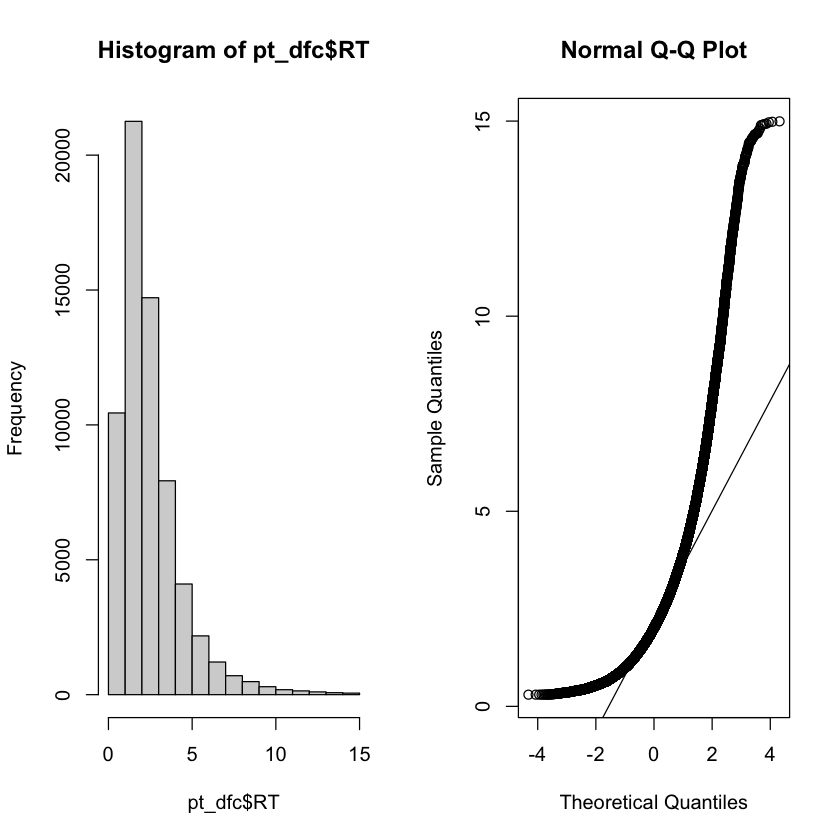

In [4]:
#Raw RTs extremely non-normal

par(mfrow=c(1,2))
hist(pt_dfc$RT)
qqnorm(pt_dfc$RT)
qqline(pt_dfc$RT)
par(mfrow=c(1,1))

In [5]:
## compute medians for analysis 
pt_dfc.med <- summarise(group_by(pt_dfc,subject,rho_cond,rho01,aSNR,uSNR),RT=median(RT))

head(pt_dfc.med)

if (!nrow(pt_dfc.med)==25*4*3*4) {
    stop('Incorrect number of data points detected!')
}

`summarise()` has grouped output by 'subject', 'rho_cond', 'rho01', 'aSNR'. You
can override using the `.groups` argument.


subject,rho_cond,rho01,aSNR,uSNR,RT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
575f387c91f8b40006c332e1,0.4,-1,0.1480,-0.1480,2.98470
575f387c91f8b40006c332e1,0.4,-1,0.1480,0.1480,2.60860
575f387c91f8b40006c332e1,0.4,-1,0.9239,-0.9239,2.75940
575f387c91f8b40006c332e1,0.4,-1,0.9239,0.9239,2.48670
575f387c91f8b40006c332e1,0.4,0,0.1480,-0.1480,2.61425
575f387c91f8b40006c332e1,0.4,0,0.1480,0.1480,2.93520


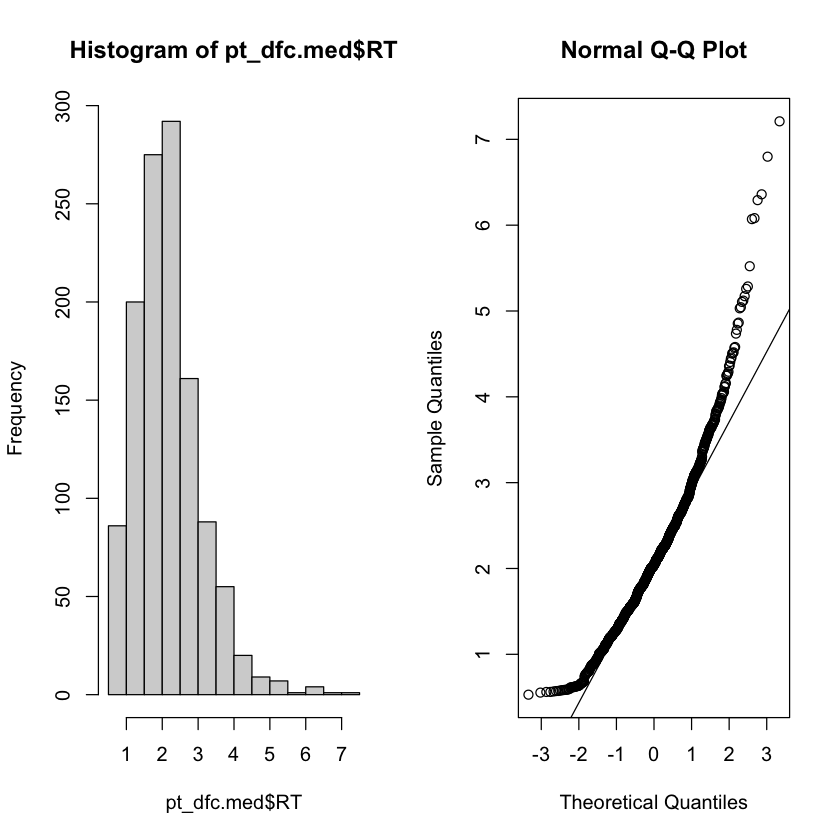

In [6]:
#How are median RTs?
#better...

par(mfrow=c(1,2))
hist(pt_dfc.med$RT)
qqnorm(pt_dfc.med$RT)
qqline(pt_dfc.med$RT)
par(mfrow=c(1,1))

In [7]:
#set up factors
pt_dfc.med$aSNR.fs <- factor(pt_dfc.med$aSNR,labels=c("l","h"))
unique(pt_dfc.med[,c('aSNR','aSNR.fs')])
contrasts(pt_dfc.med$aSNR.fs) <- contr.sum(2)
contrasts(pt_dfc.med$aSNR.fs)

pt_dfc.med$rho01.fs <- factor(pt_dfc.med$rho01,levels=c(1,-1,0),labels=c("p","n","0"))
unique(pt_dfc.med[,c('rho01','rho01.fs')])
contrasts(pt_dfc.med$rho01.fs) <- contr.sum(3)
contrasts(pt_dfc.med$rho01.fs)

#set up variables
#pt_dfc.med$zaSNR <- scale(pt_dfc.med$aSNR)
pt_dfc.med$zrho_cond <- scale(pt_dfc.med$rho_cond)

#unique(pt_dfc.med[,c('aSNR','zaSNR')])
unique(pt_dfc.med[,c('rho_cond','zrho_cond')])

aSNR,aSNR.fs
<dbl>,<fct>
0.1480,l
0.9239,h


l,1
h,-1


rho01,rho01.fs
<dbl>,<fct>
-1,n
0,0
1,p


p,1,0
n,0,1
0,-1,-1


rho_cond,zrho_cond
<dbl>,"<dbl[,1]>"
0.4,-0.4470272
0.8,1.3410817
0.6,0.4470272
0.2,-1.3410817


In [8]:
#set factors for random effects

pt_dfc.med[,c('aSNR.fs1')] <- 
  model.matrix(~1+pt_dfc.med$aSNR.fs,pt_dfc.med)[,2]
pt_dfc.med[,c('rho01.fs1','rho01.fs2')] <- 
  model.matrix(~1+pt_dfc.med$rho01.fs,pt_dfc.med)[,2:3]

unique(pt_dfc.med[,c('aSNR.fs','aSNR.fs1')])
unique(pt_dfc.med[,c('rho01.fs','rho01.fs1','rho01.fs2')])

aSNR.fs,aSNR.fs1
<fct>,<dbl>
l,1
h,-1


rho01.fs,rho01.fs1,rho01.fs2
<fct>,<dbl>,<dbl>
n,0,1
0,-1,-1
p,1,0


## fit x rho cond

Allow effects of SNR and rho to vary by rho cond

In [9]:
#now let's allow to vary by rho cond
rt.lm.1nc <- lmer(RT~aSNR.fs*zrho_cond + rho01.fs*zrho_cond + 
                  (1 + aSNR.fs1 + rho01.fs1 + rho01.fs2||subject), 
                 data=pt_dfc.med, 
                 control=lmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)))

In [10]:
summary(rt.lm.1nc)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: RT ~ aSNR.fs * zrho_cond + rho01.fs * zrho_cond + (1 + aSNR.fs1 +  
    rho01.fs1 + rho01.fs2 || subject)
   Data: pt_dfc.med
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

REML criterion at convergence: 996.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7924 -0.4806 -0.0349  0.4280  5.3361 

Random effects:
 Groups    Name        Variance Std.Dev.
 subject   (Intercept) 0.641440 0.80090 
 subject.1 aSNR.fs1    0.018690 0.13671 
 subject.2 rho01.fs1   0.008291 0.09106 
 subject.3 rho01.fs2   0.019250 0.13874 
 Residual              0.066723 0.25831 
Number of obs: 1200, groups:  subject, 100

Fixed effects:
                    Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)          2.15132    0.08044 98.00002  26.746  < 2e-16 ***
aSNR.fs1             0.20556    0.01557 98.00000  13.200  < 2e-16 ***
zrho_cond            0.05716    

In [11]:
Anova(rt.lm.1nc,test.statistic = "F",type="III")

,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),715.3286401,1,98.0000,7.934999e-47
aSNR.fs,174.2420042,1,98.0000,1.807118e-23
zrho_cond,0.5045418,1,98.0000,4.791982e-01
rho01.fs,219.9621169,2,131.5589,1.097487e-42
aSNR.fs:zrho_cond,2.8606767,1,98.0000,9.394715e-02
zrho_cond:rho01.fs,81.0443766,2,131.5589,1.154231e-23


# Error trials

In [12]:
## Error RT only
pt_dfe <- subset(pt_df,correct==0)
head(pt_dfe)

,trial,subject,rho,mu,RT,response,correct,SNRraw,threshold,rho_cond,SNR,uSNR,aSNR,rho01
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,19,5f3ee36d0306de1a411882a5,-0.2,-0.01690,3.6533,1,0,-0.1428050,0.3569007,0.2,-0.14,-0.1480,0.1480,-1
20,20,5f3ee36d0306de1a411882a5,-0.2,-0.04224,2.5721,1,0,-0.8921088,0.3569007,0.2,-0.89,-0.9239,0.9239,-1
21,21,5f3ee36d0306de1a411882a5,0.0,-0.01889,3.4319,1,0,-0.1427328,0.3569007,0.2,-0.14,-0.1480,0.1480,0
24,24,5f3ee36d0306de1a411882a5,0.0,0.01889,2.8611,0,0,0.1427328,0.3569007,0.2,0.14,0.1480,0.1480,0
28,28,5f3ee36d0306de1a411882a5,-0.2,0.01690,3.4015,0,0,0.1428050,0.3569007,0.2,0.14,0.1480,0.1480,-1
32,32,5f3ee36d0306de1a411882a5,0.0,-0.01889,5.1892,1,0,-0.1427328,0.3569007,0.2,-0.14,-0.1480,0.1480,0


In [13]:
## compute medians for analysis 
pt_dfe.med <- summarise(group_by(pt_dfe,subject,rho_cond,rho01,aSNR,uSNR),RT=median(RT))

head(pt_dfe.med)


#It looks like some participants didn't have errors in some conditions
if (!nrow(pt_dfe.med)==25*4*3*4) {
    warning('Incorrect number of data points detected! Did some Ss have perfect performance in some conds?')
    cat(sprintf('%d of %d, diff: %d',nrow(pt_dfe.med),25*4*3*4,25*4*3*4-nrow(pt_dfe.med)))
    
    pt_df_acc <- summarise(group_by(pt_df,subject,rho_cond,rho01,aSNR,uSNR),correct=mean(correct))
    head(pt_df_acc)
    sum(pt_df_acc$correct==1)
}

`summarise()` has grouped output by 'subject', 'rho_cond', 'rho01', 'aSNR'. You
can override using the `.groups` argument.


subject,rho_cond,rho01,aSNR,uSNR,RT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
575f387c91f8b40006c332e1,0.4,-1,0.1480,-0.1480,2.66340
575f387c91f8b40006c332e1,0.4,-1,0.1480,0.1480,2.35460
575f387c91f8b40006c332e1,0.4,-1,0.9239,-0.9239,3.15000
575f387c91f8b40006c332e1,0.4,-1,0.9239,0.9239,1.04430
575f387c91f8b40006c332e1,0.4,0,0.1480,-0.1480,2.88465
575f387c91f8b40006c332e1,0.4,0,0.1480,0.1480,3.70250


Warning message in eval(expr, envir, enclos):
“Incorrect number of data points detected! Did some Ss have perfect performance in some conds?”


1155 of 1200, diff: 45

`summarise()` has grouped output by 'subject', 'rho_cond', 'rho01', 'aSNR'. You
can override using the `.groups` argument.


[1] 45

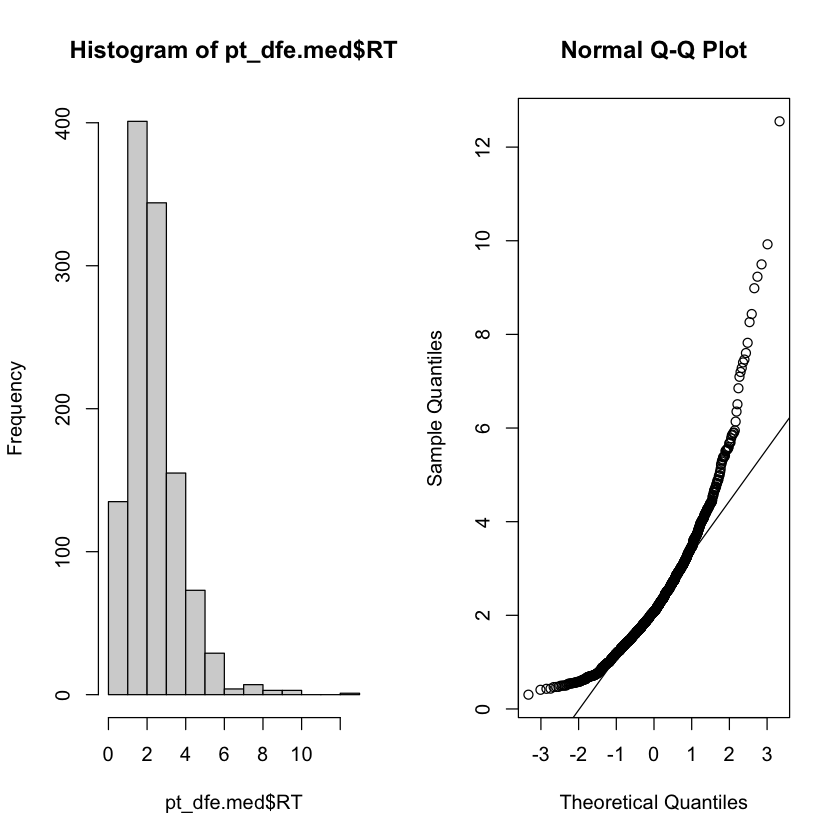

In [14]:
#Median RTs

par(mfrow=c(1,2))
hist(pt_dfe.med$RT)
qqnorm(pt_dfe.med$RT)
qqline(pt_dfe.med$RT)
par(mfrow=c(1,1))

In [15]:
#set up factors
pt_dfe.med$aSNR.fs <- factor(pt_dfe.med$aSNR,labels=c("l","h"))
unique(pt_dfe.med[,c('aSNR','aSNR.fs')])
contrasts(pt_dfe.med$aSNR.fs) <- contr.sum(2)
contrasts(pt_dfe.med$aSNR.fs)

pt_dfe.med$rho01.fs <- factor(pt_dfe.med$rho01,levels=c(1,-1,0),labels=c("p","n","0"))
unique(pt_dfe.med[,c('rho01','rho01.fs')])
contrasts(pt_dfe.med$rho01.fs) <- contr.sum(3)
contrasts(pt_dfe.med$rho01.fs)

#set up variables
#pt_dfe.med$zaSNR <- scale(pt_dfe.med$aSNR)
pt_dfe.med$zrho_cond <- scale(pt_dfe.med$rho_cond)

unique(pt_dfe.med[,c('rho_cond','zrho_cond')])

aSNR,aSNR.fs
<dbl>,<fct>
0.1480,l
0.9239,h


l,1
h,-1


rho01,rho01.fs
<dbl>,<fct>
-1,n
0,0
1,p


p,1,0
n,0,1
0,-1,-1


rho_cond,zrho_cond
<dbl>,"<dbl[,1]>"
0.4,-0.4398531
0.8,1.3427093
0.6,0.4514281
0.2,-1.3311342


In [16]:
#set factors for random effects

pt_dfe.med[,c('aSNR.fs1')] <- 
  model.matrix(~1+pt_dfe.med$aSNR.fs,pt_dfe.med)[,2]
pt_dfe.med[,c('rho01.fs1','rho01.fs2')] <- 
  model.matrix(~1+pt_dfe.med$rho01.fs,pt_dfe.med)[,2:3]

unique(pt_dfe.med[,c('aSNR.fs','aSNR.fs1')])
unique(pt_dfe.med[,c('rho01.fs','rho01.fs1','rho01.fs2')])

aSNR.fs,aSNR.fs1
<fct>,<dbl>
l,1
h,-1


rho01.fs,rho01.fs1,rho01.fs2
<fct>,<dbl>,<dbl>
n,0,1
0,-1,-1
p,1,0


## fit x rho cond

In [17]:
#now let's allow to vary by rho cond
rt.lm.1ne <- lmer(RT~aSNR.fs*zrho_cond + rho01.fs*zrho_cond + 
                  (1 + aSNR.fs1 + rho01.fs1 + rho01.fs2||subject), 
                 data=pt_dfe.med, 
                 control=lmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)))

boundary (singular) fit: see help('isSingular')



In [18]:
rePCA(rt.lm.1ne)

$subject
Standard deviations (1, .., p=4):
[1] 1.143107e+00 1.297829e-01 1.745793e-08 0.000000e+00

Rotation (n x k) = (4 x 4):
     [,1] [,2] [,3] [,4]
[1,]    1    0    0    0
[2,]    0    0    0    1
[3,]    0    0    1    0
[4,]    0    1    0    0

attr(,"class")
[1] "prcomplist"

In [19]:
summary(rt.lm.1ne)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: RT ~ aSNR.fs * zrho_cond + rho01.fs * zrho_cond + (1 + aSNR.fs1 +  
    rho01.fs1 + rho01.fs2 || subject)
   Data: pt_dfe.med
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

REML criterion at convergence: 3256.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0935 -0.4219 -0.0938  0.2990  8.3630 

Random effects:
 Groups    Name        Variance  Std.Dev. 
 subject   (Intercept) 9.744e-01 9.871e-01
 subject.1 aSNR.fs1    0.000e+00 0.000e+00
 subject.2 rho01.fs1   2.273e-16 1.508e-08
 subject.3 rho01.fs2   1.256e-02 1.121e-01
 Residual              7.457e-01 8.635e-01
Number of obs: 1155, groups:  subject, 100

Fixed effects:
                     Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)           2.37748    0.10196  97.55301  23.318  < 2e-16 ***
aSNR.fs1              0.11187    0.02552 949.57136   4.383 1.30e-05 ***
zrho_cond    

In [20]:
#refit w/o aSNR rfx to fix singularity
rt.lm.2ne <- lmer(RT~aSNR.fs*zrho_cond + rho01.fs*zrho_cond + 
                  (1 + rho01.fs1 + rho01.fs2||subject), 
                 data=pt_dfe.med, 
                 control=lmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)))

boundary (singular) fit: see help('isSingular')



In [21]:
summary(rt.lm.2ne)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: RT ~ aSNR.fs * zrho_cond + rho01.fs * zrho_cond + (1 + rho01.fs1 +  
    rho01.fs2 || subject)
   Data: pt_dfe.med
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

REML criterion at convergence: 3256.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0935 -0.4219 -0.0938  0.2990  8.3630 

Random effects:
 Groups    Name        Variance Std.Dev.
 subject   (Intercept) 0.97437  0.9871  
 subject.1 rho01.fs1   0.00000  0.0000  
 subject.2 rho01.fs2   0.01256  0.1121  
 Residual              0.74568  0.8635  
Number of obs: 1155, groups:  subject, 100

Fixed effects:
                     Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)           2.37748    0.10196  97.55303  23.318  < 2e-16 ***
aSNR.fs1              0.11187    0.02552 949.57128   4.383 1.30e-05 ***
zrho_cond             0.05229    0.10229  97.46434   0.511  0.61036    
rho01

In [22]:
#also drop rho01.fs1
rt.lm.3ne <- lmer(RT~aSNR.fs*zrho_cond + rho01.fs*zrho_cond + 
                  (1 + rho01.fs2||subject), 
                 data=pt_dfe.med, 
                 control=lmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)))

In [23]:
summary(rt.lm.3ne)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: RT ~ aSNR.fs * zrho_cond + rho01.fs * zrho_cond + (1 + rho01.fs2 ||  
    subject)
   Data: pt_dfe.med
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

REML criterion at convergence: 3256.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0935 -0.4219 -0.0938  0.2990  8.3630 

Random effects:
 Groups    Name        Variance Std.Dev.
 subject   (Intercept) 0.97437  0.9871  
 subject.1 rho01.fs2   0.01256  0.1121  
 Residual              0.74568  0.8635  
Number of obs: 1155, groups:  subject, 100

Fixed effects:
                     Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)           2.37748    0.10196  97.55303  23.318  < 2e-16 ***
aSNR.fs1              0.11187    0.02552 949.57133   4.383 1.30e-05 ***
zrho_cond             0.05229    0.10229  97.46434   0.511  0.61036    
rho01.fs1            -0.28205    0.03600 943.42931  -7.835

In [24]:
#let's make sure the full (no corr) model and the reduced give same result (yes)

Anova(rt.lm.1ne,test.statistic = "F",type="III")
cat('Use me:')
Anova(rt.lm.3ne,test.statistic = "F",type="III")

,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),543.7166906,1,98.02122,8.828485e-42
aSNR.fs,19.1996466,1,97.08671,2.979615e-05
zrho_cond,0.2613316,1,97.93235,6.103574e-01
rho01.fs,58.1974369,2,134.56192,6.146195e-19
aSNR.fs:zrho_cond,1.0118141,1,95.82551,3.170019e-01
zrho_cond:rho01.fs,13.4486139,2,133.26813,4.783921e-06


Use me:

,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),543.7320616,1,98.02122,8.818105e-42
aSNR.fs,19.2082633,1,960.53712,1.301138e-05
zrho_cond,0.2613378,1,97.93235,6.103532e-01
rho01.fs,58.4091883,2,234.74221,2.582574e-21
aSNR.fs:zrho_cond,1.0121957,1,957.94208,3.146314e-01
zrho_cond:rho01.fs,13.4971417,2,233.48274,2.838415e-06
